In [1]:
#Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

C:\Users\victo\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Fazer download do dataset diretamente pelo python
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

In [2]:
#Criar lista com nome das colunas
nome_colunas = ['CRIM',
                'ZN',
                'INDUS',
                'CHAS',
                'NOX',
                'RM',
                'AGE',
                'DIS',
                'RAD',
                'TAX',
                'PTRATIO',
                'B',
                'LSTAT', 
                'MEDV']

In [5]:
# Carregar o dataset
dataset = pd.read_csv(dataset_path,
                     names = nome_colunas,
                     na_values = "?",
                     comment = "\t",
                     sep = " ",
                     skipinitialspace = True)

In [6]:
# tamanho do dataset
dataset.shape

(506, 14)

In [7]:
# primeiras linhas do dataset
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
#Split dos dados para treino e teste
dados_treino = dataset.sample(frac= 0.8, random_state= 0 )
dados_teste = dataset.drop(dados_treino.index)

## Modelagem Preditiva - Regressão Linear Simples

Na regressão linear simples desejamos modelar a relação entre a variável dependente (y) e uma variável independente (x).

* Variável independente: 'RM' - Média de quartos por moradia
* Variável dependente: 'MEDV' - mediana do preço das casas ocupadas por proprietários em $1000

Queremos prever o valor da mediana das casas ocupadas por proprietários com base no número de quartos.

Vamos criar um plot mostrando a relação atual entre as variáveis.

Basicamente temos $MEDV=f(RM)$ e queremos estimar a função $f()$ usando regressão linear.

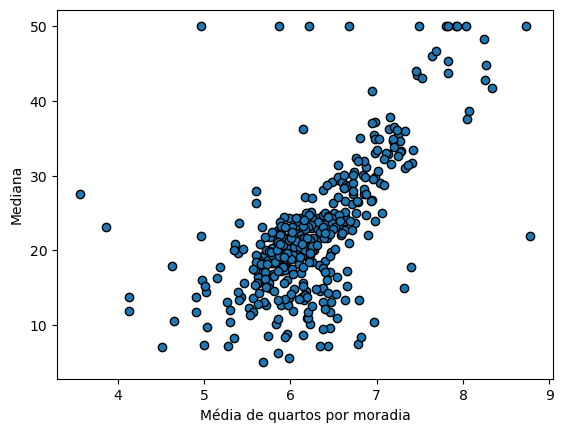

In [16]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors=(0, 0, 0))
ax.set_xlabel('Média de quartos por moradia')
ax.set_ylabel('Mediana')
plt.show()

In [17]:
# Separar X e y para treino e teste
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

In [11]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name  = 'layer')])
    
    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01,
                                        beta_1= 0.9,
                                        beta_2= 0.99,
                                        epsilon= 1e-05,
                                        amsgrad= False,
                                        name= 'Adam')
    
    # Compila o modelo
    model.compile(loss= 'mse',
                 optimizer = optimizer,
                 metrics= ['mae', 'mse'])
    
    return model

In [12]:
# Cria o modelo
modelo = modelo_linear()

## Treinamento do modelo

In [18]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idel_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('checkpoint salvo a cada {} amostras'. format(n_samples_save))

checkpoint salvo a cada 81000 amostras


In [21]:
# Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                patience= n_idel_epochs,
                                                min_delta = 0.001)

In [22]:
    # Lista para as previsões
    predictions_list = []

In [23]:
# Caminho para salvar o checkpoint
checkpoint_path = "dados/"

In [24]:
# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath= "dados/",
                                                       verbose= 1,
                                                       save_weights_only=True,
                                                       save_freq= n_samples_save)

In [26]:
# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [27]:
# Treinamento
history = modelo.fit(x_treino,
                    y_treino,
                    batch_size= batch_size,
                    epochs= n_epochs,
                    validation_split= 0.1,
                    verbose= 1,
                    callbacks= [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 8s 3s/step - loss: 1072.5229 - mae: 31.3561 - mse: 1072.5229 - val_loss: 1184.1649 - val_mae: 32.6645 - val_mse: 1184.1649
Epoch 2/4000
2/2 [==============================] - 2s 2s/step - loss: 1063.2264 - mae: 31.2105 - mse: 1063.2264 - val_loss: 1174.5037 - val_mae: 32.5186 - val_mse: 1174.5037
Epoch 3/4000
2/2 [==============================] - 0s 73ms/step - loss: 1053.9148 - mae: 31.0650 - mse: 1053.9147 - val_loss: 1164.8844 - val_mae: 32.3727 - val_mse: 1164.8844
Epoch 4/4000
2/2 [==============================] - 0s 66ms/step - loss: 1044.7811 - mae: 30.9201 - mse: 1044.7811 - val_loss: 1155.3070 - val_mae: 32.2268 - val_mse: 1155.3070
Epoch 5/4000
2/2 [==============================] - 0s 85ms/step - loss: 1035.7126 - mae: 30.7751 - mse: 1035.7126 - val_loss: 1145.7888 - val_mae: 32.0812 - val_mse: 1145.7888
Epoch 6/4000
2/2 [==============================] - 0s 60ms/step - loss: 1026.5004 - mae: 30.6297 - mse: 1026.5002 - va

limit_output extension: Maximum message size of 10000 exceeded with 10018 characters

In [28]:
# Retornado os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [30]:
# Prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [31]:
# Cria o dataframe
steps = pd.RangeIndex(start = 0, stop= num_values)
df = pd.DataFrame(values, steps, columns= ['MSE em Treino', "MSE em Validação"])

In [35]:
df.head()

,MSE em Treino,MSE em Validação
0,1072.522949,1184.164917
1,1063.226440,1174.503662
2,1053.914673,1164.884399
3,1044.781128,1155.307007
4,1035.712646,1145.788818


<AxesSubplot:>

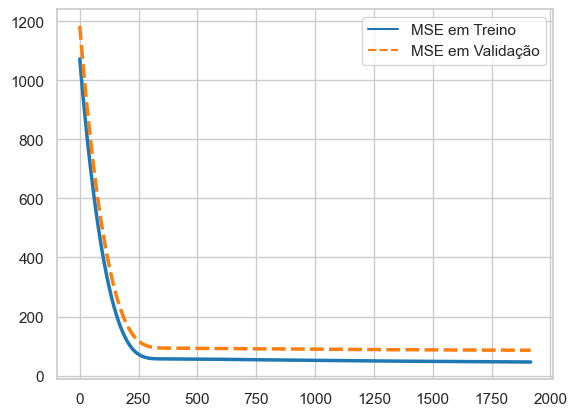

In [32]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth = 2.5)

In [33]:
# Previsões com o modelo treinado
previsoes = modelo.predict(y_teste).flatten()

4/4 [==============================] - 0s 4ms/step


In [34]:
# Imprime as previsões
previsoes

array([ 90.81972 ,  63.79612 ,  88.11736 ,  67.038956,  60.012817,
       122.1671  , 155.13588 , 125.40993 ,  78.38887 , 115.14096 ,
       159.45967 , 119.46474 , 111.898125, 122.707565, 117.84332 ,
       108.655304, 116.22191 , 107.574356, 168.10722 ,  94.06255 ,
        87.57689 ,  92.44114 ,  92.981606,  98.38632 ,  76.22698 ,
        85.955475,  94.60303 ,  67.57943 ,  94.60303 , 258.90652 ,
       123.78851 , 113.51955 , 110.817184, 121.62663 , 203.77837 ,
       164.32391 , 148.65022 , 185.40233 , 156.75731 , 258.90652 ,
       152.43352 , 217.29016 , 250.79942 ,  92.981606, 108.655304,
       116.762375,  83.79359 , 122.707565, 258.90652 , 252.42085 ,
       111.898125, 258.90652 , 178.91666 , 167.56674 , 107.574356,
       109.19576 , 142.70503 , 190.26656 , 139.4622  , 117.30284 ,
       113.51955 ,  88.65784 , 123.78851 , 108.655304, 102.710106,
        88.65784 , 100.007744,  84.87453 , 111.35766 , 110.817184,
       258.90652 ,  63.79612 ,  36.23205 ,  43.798656,  50.824